This data set contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this data set is a compilation of those ratings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df1 = pd.read_csv(r"C:\Users\ramni\Downloads\archive(9)\anime.csv")
df1.head(5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
df1.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [4]:
df1.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [5]:
df1.shape

(12294, 7)

In [6]:
(df1.isnull().sum().sum()/df1.shape[0])*100

2.5784935741011874

We can note that 2.5% data is missing even if we delete them we can retrive more than 97% data

In [7]:
df1 = df1.dropna()
df1.shape

(12017, 7)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB


In [9]:
df1['anime_id'] = df1['anime_id'].astype(object)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  object 
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 751.1+ KB


In [11]:
def split_and_strip(genres):
    if isinstance(genres, str):  
        return list(set(genre.strip() for genre in genres.split(',') if genre.strip()))
    return []  

df1['genre_split'] = df1['genre'].apply(split_and_strip)
exploded = df1.explode('genre_split')
one_hot_encoded = exploded['genre_split'].str.get_dummies()
df_encoded = exploded.drop(columns=['genre', 'genre_split']).reset_index(drop=True).join(one_hot_encoded.reset_index(drop=True))
df_encoded = df_encoded.groupby("anime_id")[["Action", 'Adventure', 'Cars', 'Comedy', 'Dementia',
       'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai',
       'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts',
       'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police',
       'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen',
       'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life',
       'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire',
       'Yaoi', 'Yuri']].sum()
df_encoded = df_encoded.reset_index()
df_encoded.head(5)

,anime_id,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,1,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,6,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,8,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [12]:
df1.shape

(12017, 8)

In [13]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12017 entries, 0 to 12016
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   anime_id       12017 non-null  int64
 1   Action         12017 non-null  int64
 2   Adventure      12017 non-null  int64
 3   Cars           12017 non-null  int64
 4   Comedy         12017 non-null  int64
 5   Dementia       12017 non-null  int64
 6   Demons         12017 non-null  int64
 7   Drama          12017 non-null  int64
 8   Ecchi          12017 non-null  int64
 9   Fantasy        12017 non-null  int64
 10  Game           12017 non-null  int64
 11  Harem          12017 non-null  int64
 12  Hentai         12017 non-null  int64
 13  Historical     12017 non-null  int64
 14  Horror         12017 non-null  int64
 15  Josei          12017 non-null  int64
 16  Kids           12017 non-null  int64
 17  Magic          12017 non-null  int64
 18  Martial Arts   12017 non-null  int64
 19  Mech

In [14]:
df3 = df1.drop(["genre","genre_split"],axis = 1)
df3.head(5)

,anime_id,name,type,episodes,rating,members
0,32281,Kimi no Na wa.,Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665
2,28977,Gintama°,TV,51,9.25,114262
3,9253,Steins;Gate,TV,24,9.17,673572
4,9969,Gintama&#039;,TV,51,9.16,151266


In [15]:
df_merge = pd.merge(df3,df_encoded,on = "anime_id")
df_merge.head(5)

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1,9.37,200630,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51,9.25,114262,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24,9.17,673572,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,TV,51,9.16,151266,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


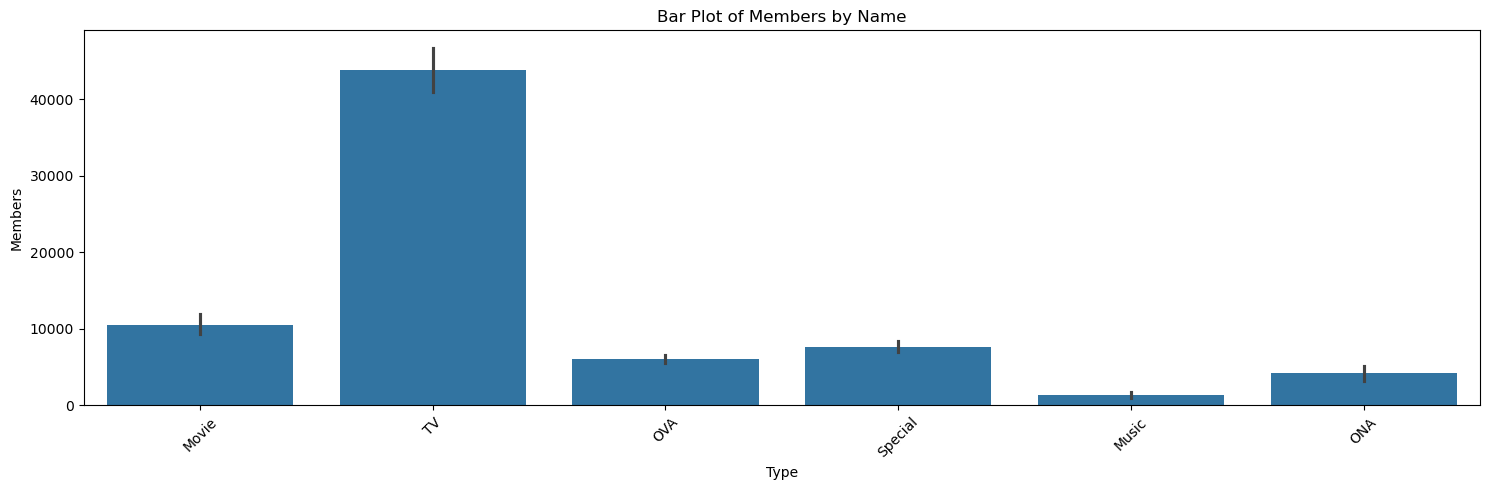

In [16]:
plt.figure(figsize =(15,5))
sns.barplot(x='type', y='members', data=df_merge)
plt.xticks(rotation=45)
plt.xlabel('Type')
plt.ylabel('Members')
plt.title('Bar Plot of Members by Name')
plt.tight_layout() 
plt.show()

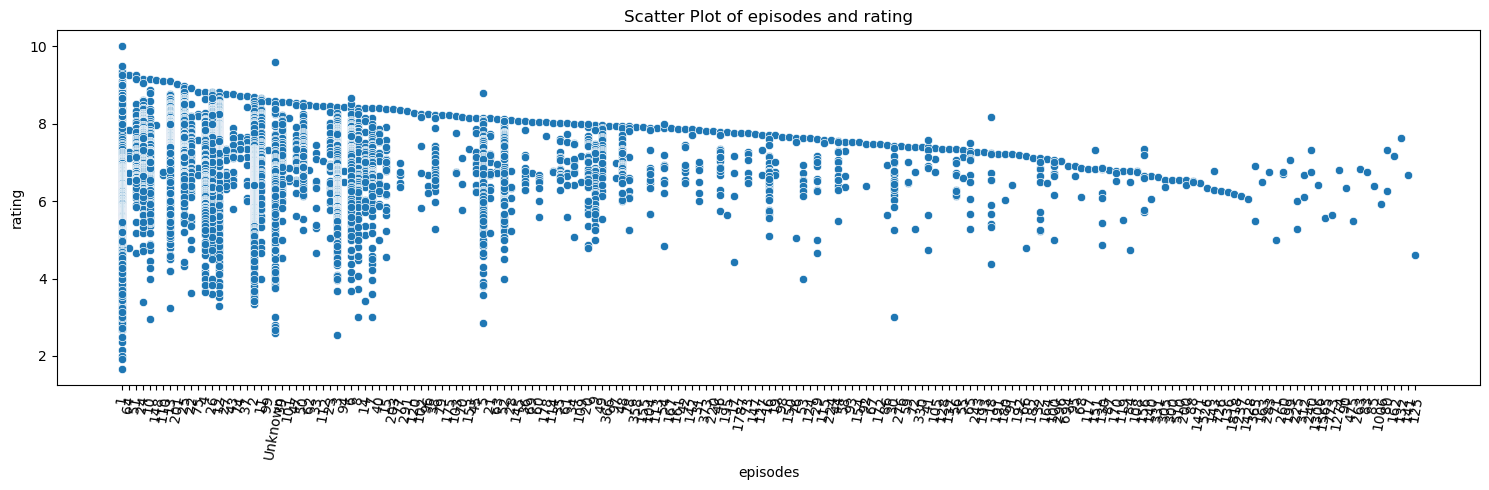

In [17]:
plt.figure(figsize =(15,5))
sns.scatterplot(x='episodes', y='rating', data=df_merge)
plt.xticks(rotation=80)
plt.xlabel('episodes')
plt.ylabel('rating')
plt.title('Scatter Plot of episodes and rating')
plt.tight_layout() 
plt.show()

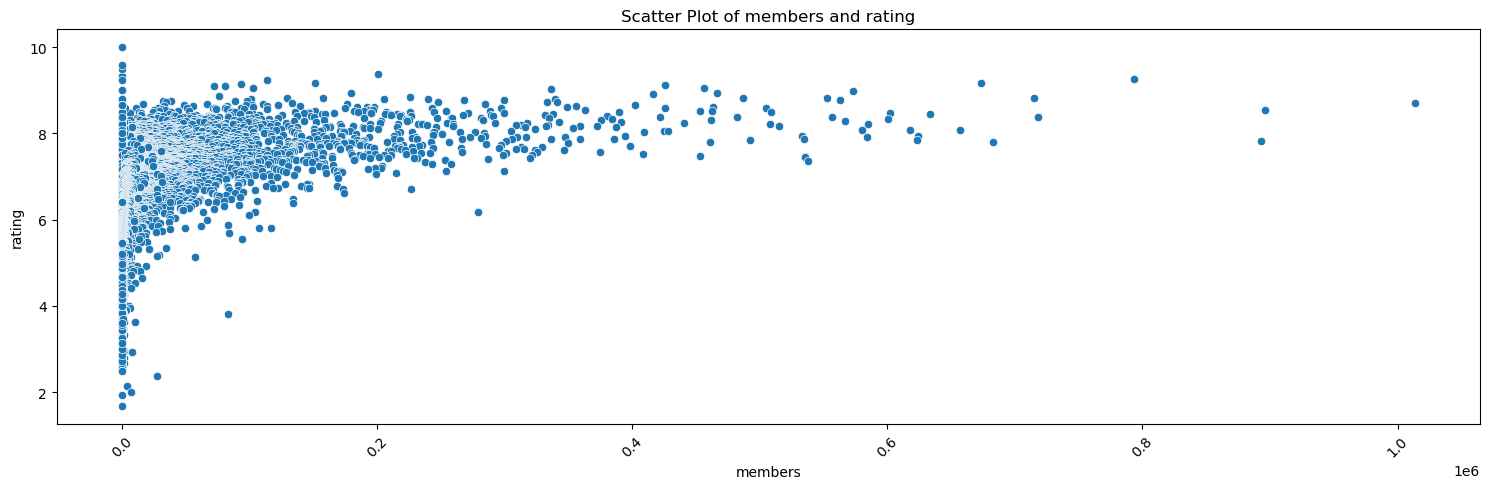

In [18]:
plt.figure(figsize =(15,5))
sns.scatterplot(x='members', y='rating', data=df_merge)
plt.xticks(rotation=45)
plt.xlabel('members')
plt.ylabel('rating')
plt.title('Scatter Plot of members and rating')
plt.tight_layout() 
plt.show()

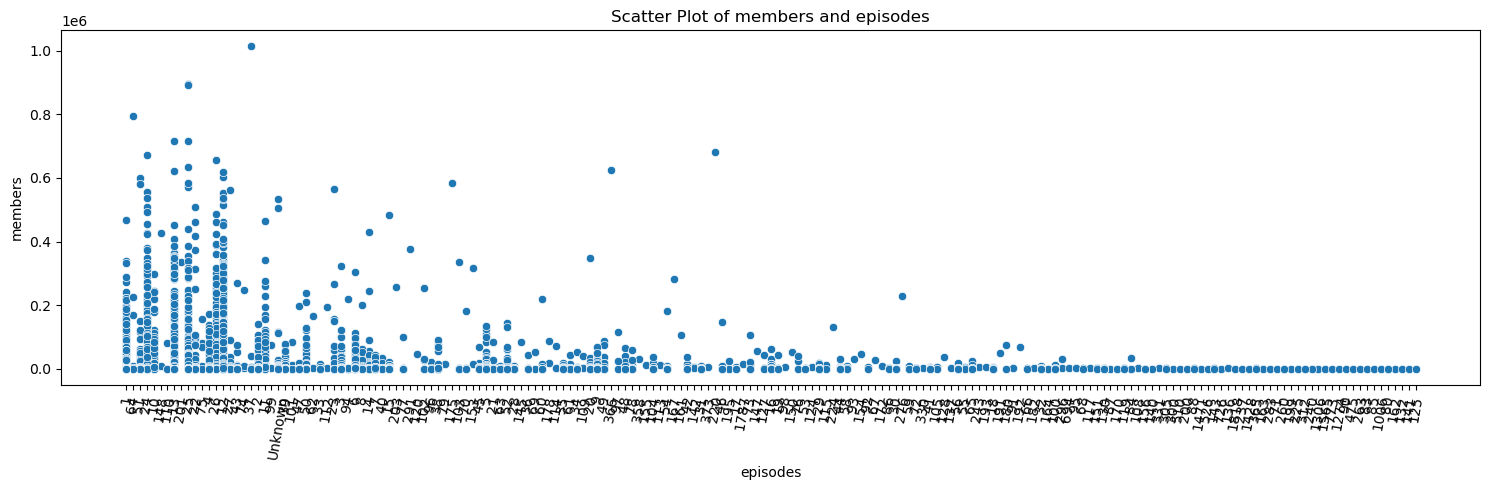

In [19]:
plt.figure(figsize =(15,5))
sns.scatterplot(x='episodes', y='members', data=df_merge)
plt.xticks(rotation=80)
plt.xlabel('episodes')
plt.ylabel('members')
plt.title('Scatter Plot of members and episodes')
plt.tight_layout()  
plt.show()

In [20]:
df_merge.corr(numeric_only = True)

,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
rating,1.000000,0.388499,0.165049,0.126123,-0.000732,0.110385,-0.203620,0.030257,0.216260,0.043206,...,0.033999,0.082210,0.036058,0.063066,0.082651,0.153727,0.074970,0.036356,-0.002452,-0.022273
members,0.388499,1.000000,0.156043,0.010386,-0.015725,0.069631,-0.028096,0.040792,0.087458,0.090430,...,0.005732,0.049201,-0.016246,-0.017672,0.111763,0.207253,0.151452,0.074866,-0.004167,-0.014642
Action,0.165049,0.156043,1.000000,0.169123,0.031796,-0.086212,-0.063578,0.080115,0.001928,0.035830,...,-0.020086,-0.165433,0.137367,0.005019,0.237215,0.104013,0.019204,0.052141,-0.016731,-0.021841
Adventure,0.126123,0.010386,0.169123,1.000000,-0.005129,0.009243,-0.061883,0.024439,0.005109,-0.048377,...,-0.020463,-0.118074,0.059716,-0.070423,0.036720,0.003115,-0.031472,-0.026180,-0.027520,-0.028589
Cars,-0.000732,-0.015725,0.031796,-0.005129,1.000000,-0.043107,-0.011036,-0.012144,0.000450,-0.018231,...,-0.005591,-0.022315,-0.007787,0.166588,-0.015331,-0.019501,-0.006591,-0.007112,-0.004373,-0.004543
Comedy,0.110385,0.069631,-0.086212,0.009243,-0.043107,1.000000,-0.083161,-0.038459,-0.144994,0.175511,...,0.022476,0.131065,-0.068355,0.007559,0.033634,-0.013701,-0.050302,-0.002021,-0.013635,-0.010607
Dementia,-0.203620,-0.028096,-0.063578,-0.061883,-0.011036,-0.083161,1.000000,-0.022234,-0.038913,-0.028011,...,-0.001900,-0.045443,-0.018729,-0.030623,-0.028069,-0.021235,-0.004983,-0.013021,-0.008006,-0.008317
Demons,0.030257,0.040792,0.080115,0.024439,-0.012144,-0.038459,-0.022234,1.000000,-0.019429,0.009800,...,-0.011265,-0.052195,-0.025024,-0.031051,0.026465,0.223056,-0.000349,0.039668,-0.008810,0.000194
Drama,0.216260,0.087458,0.001928,0.005109,0.000450,-0.144994,-0.038913,-0.019429,1.000000,-0.060833,...,0.062033,0.063483,0.077226,0.040679,-0.036843,0.028688,0.047535,0.008767,0.062959,-0.022115
Ecchi,0.043206,0.090430,0.035830,-0.048377,-0.018231,0.175511,-0.028011,0.009800,-0.060833,1.000000,...,-0.016911,-0.028543,-0.018665,-0.008816,0.036261,0.041526,-0.019936,0.027883,-0.013226,0.043973


In [21]:
type_counts = df_merge["type"].value_counts()
print(type_counts)

type
TV         3668
OVA        3284
Movie      2259
Special    1670
ONA         648
Music       488
Name: count, dtype: int64


In [22]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12017 entries, 0 to 12016
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       12017 non-null  object 
 1   name           12017 non-null  object 
 2   type           12017 non-null  object 
 3   episodes       12017 non-null  object 
 4   rating         12017 non-null  float64
 5   members        12017 non-null  int64  
 6   Action         12017 non-null  int64  
 7   Adventure      12017 non-null  int64  
 8   Cars           12017 non-null  int64  
 9   Comedy         12017 non-null  int64  
 10  Dementia       12017 non-null  int64  
 11  Demons         12017 non-null  int64  
 12  Drama          12017 non-null  int64  
 13  Ecchi          12017 non-null  int64  
 14  Fantasy        12017 non-null  int64  
 15  Game           12017 non-null  int64  
 16  Harem          12017 non-null  int64  
 17  Hentai         12017 non-null  int64  
 18  Histor

In [23]:
label_encoder = preprocessing.LabelEncoder() 
df_merge['type']= label_encoder.fit_transform(df_merge['type']) 
df_merge['type'].unique() 

array([0, 5, 3, 4, 1, 2])

In [24]:
df_merge = df_merge.drop("name",axis = 1)
df_merge.head()

,anime_id,type,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,0,1,9.37,200630,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,5,64,9.26,793665,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,5,51,9.25,114262,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,5,24,9.17,673572,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,5,51,9.16,151266,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12017 entries, 0 to 12016
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       12017 non-null  object 
 1   type           12017 non-null  int32  
 2   episodes       12017 non-null  object 
 3   rating         12017 non-null  float64
 4   members        12017 non-null  int64  
 5   Action         12017 non-null  int64  
 6   Adventure      12017 non-null  int64  
 7   Cars           12017 non-null  int64  
 8   Comedy         12017 non-null  int64  
 9   Dementia       12017 non-null  int64  
 10  Demons         12017 non-null  int64  
 11  Drama          12017 non-null  int64  
 12  Ecchi          12017 non-null  int64  
 13  Fantasy        12017 non-null  int64  
 14  Game           12017 non-null  int64  
 15  Harem          12017 non-null  int64  
 16  Hentai         12017 non-null  int64  
 17  Historical     12017 non-null  int64  
 18  Horror

In [26]:
df_merge.replace('Unknown', np.nan, inplace=True)
df_merge = df_merge.fillna(0)

C:\Users\ramni\AppData\Local\Temp\ipykernel_21260\3168487665.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merge = df_merge.fillna(0)


In [27]:
df_merge.isnull().sum()

anime_id         0
type             0
episodes         0
rating           0
members          0
Action           0
Adventure        0
Cars             0
Comedy           0
Dementia         0
Demons           0
Drama            0
Ecchi            0
Fantasy          0
Game             0
Harem            0
Hentai           0
Historical       0
Horror           0
Josei            0
Kids             0
Magic            0
Martial Arts     0
Mecha            0
Military         0
Music            0
Mystery          0
Parody           0
Police           0
Psychological    0
Romance          0
Samurai          0
School           0
Sci-Fi           0
Seinen           0
Shoujo           0
Shoujo Ai        0
Shounen          0
Shounen Ai       0
Slice of Life    0
Space            0
Sports           0
Super Power      0
Supernatural     0
Thriller         0
Vampire          0
Yaoi             0
Yuri             0
dtype: int64

In [28]:
df_drop = df_merge.copy()
anime_id = df_drop.pop("anime_id")

In [29]:
scaler = StandardScaler()
df_Scaled = scaler.fit_transform(df_drop)
df_Scaled

array([[-1.6879846 , -0.24153448,  2.82447359, ..., -0.09160444,
        -0.05632245, -0.0585108 ],
       [ 1.07888998,  1.10597769,  2.7170322 , ..., -0.09160444,
        -0.05632245, -0.0585108 ],
       [ 1.07888998,  0.82791962,  2.70726481, ..., -0.09160444,
        -0.05632245, -0.0585108 ],
       ...,
       [-0.02785985, -0.17736723, -1.56108822, ..., -0.09160444,
        -0.05632245, -0.0585108 ],
       [-0.02785985, -0.24153448, -1.46341424, ..., -0.09160444,
        -0.05632245, -0.0585108 ],
       [-1.6879846 , -0.24153448, -0.99457912, ..., -0.09160444,
        -0.05632245, -0.0585108 ]])

In [30]:
df_df1 = pd.DataFrame( df_Scaled, columns = list(df_drop.columns))
df_df1.head()

,type,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,-1.687985,-0.241534,2.824474,3.292044,-0.547061,-0.488609,-0.077638,-0.784063,-0.142146,-0.15642,...,-0.072015,-0.333688,-0.179968,-0.215435,-0.197468,3.317378,-0.084901,-0.091604,-0.056322,-0.058511
1,1.078890,1.105978,2.717032,14.002410,1.827950,2.046628,-0.077638,-0.784063,-0.142146,-0.15642,...,-0.072015,-0.333688,-0.179968,-0.215435,-0.197468,-0.301443,-0.084901,-0.091604,-0.056322,-0.058511
2,1.078890,0.827920,2.707265,1.732216,1.827950,-0.488609,-0.077638,1.275408,-0.142146,-0.15642,...,-0.072015,-0.333688,-0.179968,-0.215435,-0.197468,-0.301443,-0.084901,-0.091604,-0.056322,-0.058511
3,1.078890,0.250414,2.629126,11.833499,-0.547061,-0.488609,-0.077638,-0.784063,-0.142146,-0.15642,...,-0.072015,-0.333688,-0.179968,-0.215435,-0.197468,-0.301443,11.778479,-0.091604,-0.056322,-0.058511
4,1.078890,0.827920,2.619358,2.400518,1.827950,-0.488609,-0.077638,1.275408,-0.142146,-0.15642,...,-0.072015,-0.333688,-0.179968,-0.215435,-0.197468,-0.301443,-0.084901,-0.091604,-0.056322,-0.058511


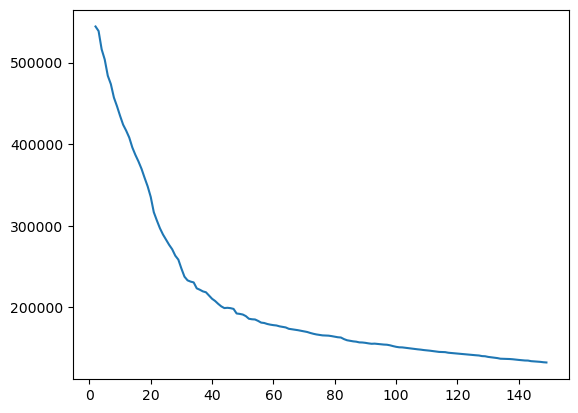

In [31]:
#Elbow method
cluster = list(range(2,150))
ssd = []
for num_clusters in cluster:
    models_clus = KMeans( n_clusters = num_clusters , max_iter = 150 , random_state = 42)
    models_clus.fit(df_df1)
    ssd.append(models_clus.inertia_)

plt.plot(cluster,ssd);

In [32]:
j = list(range(2,150))
a = 1
for i in j:
    kmeans = KMeans(n_clusters = i, max_iter = 150, random_state = 42)
    kmeans.fit(df_df1)

    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_df1, cluster_labels)
    if a > silhouette_avg:
        print("For n_clusters = {}, the Silhouette score is {}".format(i,silhouette_avg))
        a = silhouette_avg

For n_clusters = 2, the Silhouette score is 0.1677375756935735
For n_clusters = 4, the Silhouette score is 0.13899739072643663
For n_clusters = 5, the Silhouette score is 0.02788461352746341
For n_clusters = 7, the Silhouette score is 0.027020357910548715


as per elbow method number of clusters should be between 40-50 and as per silhouette_score it 7 is enouf so for computational efficiency and to give larger number of anime to watch per cluster lets go with 7 clusters

In [33]:
kmeans = KMeans(n_clusters = 7, max_iter = 150, random_state = 42)
kmeans.fit(df_df1)

KMeans(max_iter=150, n_clusters=7, random_state=42)

In [34]:
df1["cluster_id"] = kmeans.labels_

In [35]:
df1.head()

,anime_id,name,genre,type,episodes,rating,members,genre_split,cluster_id
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"[School, Supernatural, Romance, Drama]",5
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,"[Military, Adventure, Magic, Action, Fantasy, ...",6
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,"[Parody, Historical, Action, Samurai, Shounen,...",1
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,"[Sci-Fi, Thriller]",6
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,"[Parody, Historical, Action, Samurai, Shounen,...",1


In [36]:
df1["cluster_id"].unique()

array([5, 6, 1, 0, 3, 4, 2])

In [37]:
df1 = df1.drop(["genre_split"], axis = 1)
df1.head()

,anime_id,name,genre,type,episodes,rating,members,cluster_id
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,5
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,6
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,1
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,6
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,1
